                                                    PROJECT : Customer Churn

Problem Statement: You are the data scientist at a telecom company named “Neo” whose customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_csv(r"C:\Users\sharm\OneDrive\Desktop\Data Science\Python\Python_projects\Customer Churn\customer_churn.csv")

In [5]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Manipulation

● Extract the 5th column and store it in ‘customer_5’

In [11]:
customer_5 = data.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

● Extract the 15th column and store it in ‘customer_15’

In [13]:
customer_15 = data.iloc[:, 14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’

In [15]:
senior_male_electronic = data[(data['gender'] == 'Male') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


● Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in 'customer_total_tenure'

In [17]:
customer_total_tenure = data[(data['tenure'] > 70) | (data['MonthlyCharges'] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

In [19]:
two_mail_yes = data[(data['Contract'] == 'Two year') & (data['PaymentMethod'] == 'Mailed check') & (data['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


Extract 333 random records from the customer_churn dataframe and store
the result in ‘customer_333

In [21]:
customer_333 = data.sample(n = 333, random_state = 42)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1199.4,No
3601,1552-CZCLL,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,1087.25,No
2149,2014-MKGMH,Female,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.10,4674.4,No
5141,0303-WMMRN,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No


● Get the count of different levels from the ‘Churn’ column

In [23]:
Churn_counts = data['Churn'].value_counts()
Churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

Data Visualization 

● Build a bar-plot for the ’InternetService’ column:
a. Set x-axis label to ‘Categories of Internet Service’
b. Set y-axis label to ‘Count of Categories’
c. Set the title of plot to be ‘Distribution of Internet Service’
d. Set the color of the bars to be ‘orange

In [26]:
le = LabelEncoder()
data['InternetService'] = le.fit_transform(data['InternetService'])
data['InternetService']

0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, Length: 7043, dtype: int32

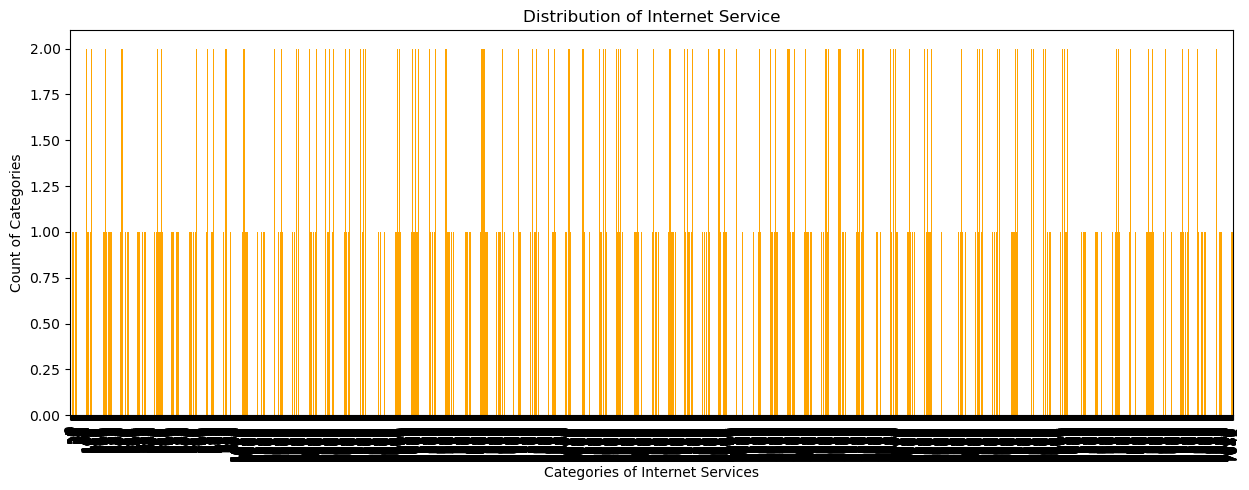

In [27]:
plt.figure(figsize = (15,5))
data['InternetService'].plot(kind = 'bar', color = 'orange')
plt.xlabel('Categories of Internet Services')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

● Build a histogram for the ‘tenure’ column:
a. Set the number of bins to be 30
b. Set the color of the bins to be ‘green’
c. Assign the title ‘Distribution of tenure’

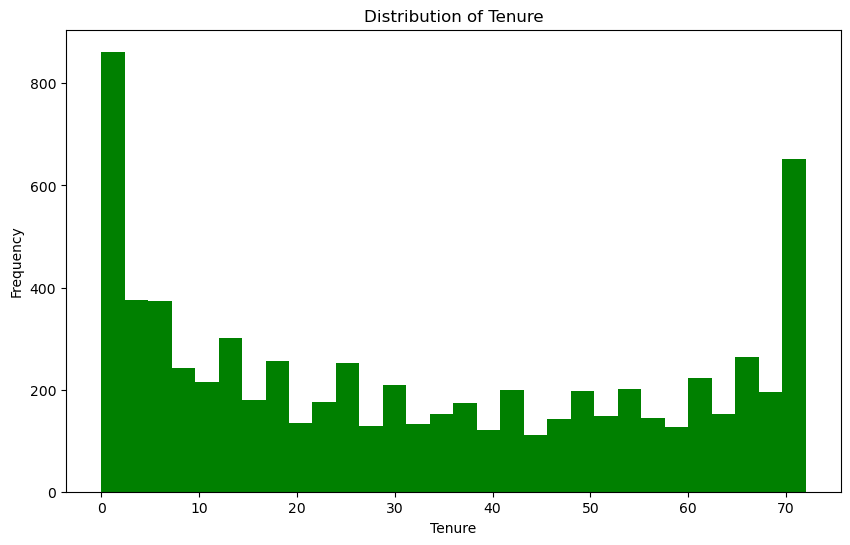

In [29]:
plt.figure(figsize = (10,6))
plt.hist(data['tenure'], bins = 30, color = 'green')

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
a. Assign the points a color of ‘brown’
b. Set the x-axis label to ‘Tenure of customer’
c. Set the y-axis label to ‘Monthly Charges of customer’
d. Set the title to ‘Tenure vs Monthly Charges’
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &
f. ‘Contract’ on the x-axis.

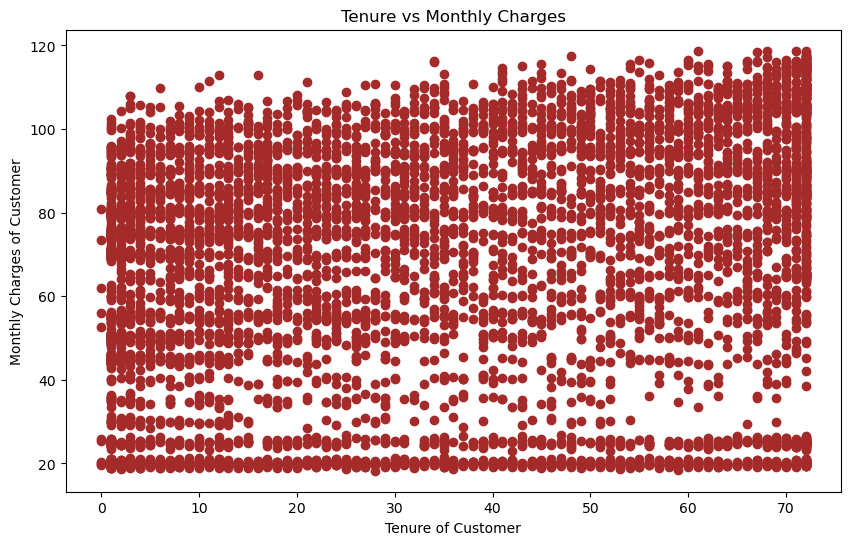

In [31]:
plt.figure(figsize = (10,6))
plt.scatter(x = data['tenure'], y = data['MonthlyCharges'], color = 'brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

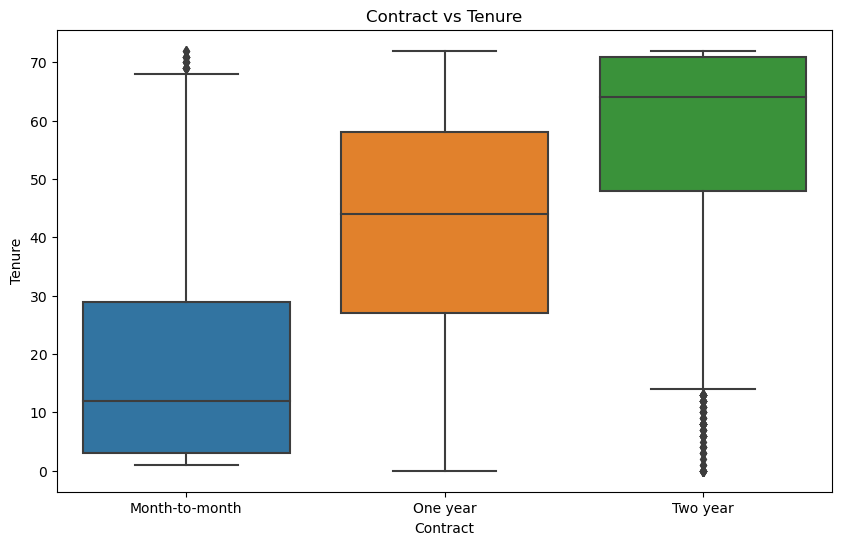

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(x = data['Contract'], y = data['tenure'])
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Contract vs Tenure')
plt.show()

Linear Regression

● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:
a. Divide the dataset into train and test sets in 70:30 ratio.
b. Build the model on train set and predict the values on test set
c. After predicting the values, find the root mean square error
d. Find out the error in prediction & store the result in ‘error’
e. Find the root mean square error

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X = data[['tenure']]
Y = data[['MonthlyCharges']]

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred_lr = lin_reg.predict(X_test)

In [39]:
mse = mean_squared_error(Y_test, y_pred_lr)
mse

845.6091871095867

In [40]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)

Root Mean Squared Error 29.07936015646814


In [41]:
error = Y_test - y_pred_lr
error

,MonthlyCharges
185,-30.306590
2715,-42.185209
3825,-51.475579
1807,21.243410
132,-24.898812
...,...
5522,15.043410
6377,-10.456590
5500,-12.791303
2392,29.737316


Logistic Regression

● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:
a. Divide the dataset in 65:35 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and get the accuracy score
d. Build a multiple logistic regression model where dependent variable
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’
e. Divide the dataset in 80:20 ratio
f. Build the model on train set and predict the values on test set
g. Build the confusion matrix and get the accuracy score

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
X = data[['MonthlyCharges']]
Y = data['Churn']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 42)

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred_log = log_reg.predict(X_test)

In [48]:
ac = accuracy_score(Y_test, y_pred_log)
ac

0.7287104622871047

In [49]:
cm = confusion_matrix(Y_test, y_pred_log)
cm

array([[1797,    0],
       [ 669,    0]], dtype=int64)

Multiple Logistic Regression

In [51]:
data['Churn'] = data['Churn'].apply(lambda x:1 if x == 'Yes' else 0)
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [52]:
X = data[['tenure', 'MonthlyCharges']]
Y = data['Churn']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [54]:
multi_log_reg = LogisticRegression()
multi_log_reg.fit(X_train, Y_train)
y_pred_m = multi_log_reg.predict(X_test)

In [55]:
ac1 = accuracy_score(Y_test, y_pred_m)
ac1

0.7977288857345636

In [56]:
cm1 = confusion_matrix(Y_test, y_pred_m)
cm1

array([[944,  92],
       [193, 180]], dtype=int64)

Decision Tree

● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:
a. Divide the dataset in 80:20 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
X = data[['tenure']]
Y = data['Churn']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

In [63]:
ac_dt = accuracy_score(Y_test, y_pred_dt)
ac_dt

0.7572746628814763

In [64]:
cm_dt = confusion_matrix(Y_test, y_pred_dt)
cm_dt

array([[951,  85],
       [257, 116]], dtype=int64)

Random Forest

● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:
a. Divide the dataset in 70:30 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
X = data[['tenure']]
Y = data['Churn']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [70]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

In [71]:
ac_rfc = accuracy_score(Y_test, y_pred_rfc)
ac_rfc

0.7510648367250355

In [72]:
cm_rfc = confusion_matrix(Y_test, y_pred_rfc)
cm_rfc

array([[1399,  140],
       [ 386,  188]], dtype=int64)